# Fourier Transformation

Whats done here

In [3]:
import numpy as num
import matplotlib.pyplot as plt

import pandas as pd

In [56]:
file = 'data/NY_climate_2010.csv'
file = 'data/hourly_data_xxxx.txt' # https://opendata.dwd.de/climate_environment/CDC/observations_germany/climate/hourly/air_temperature/historical/

df = pd.read_csv(file, sep=';')

In [57]:
print(df.head(10))

   STATIONS_ID  MESS_DATUM  QN_9  TT_TU  RF_TU  eor
0            3  1950040101     5    5.7   83.0  eor
1            3  1950040102     5    5.6   83.0  eor
2            3  1950040103     5    5.5   83.0  eor
3            3  1950040104     5    5.5   83.0  eor
4            3  1950040105     5    5.8   85.0  eor
5            3  1950040106     5    5.9   84.0  eor
6            3  1950040107     5    6.0   81.0  eor
7            3  1950040108     5    6.4   79.0  eor
8            3  1950040109     5    7.1   80.0  eor
9            3  1950040110     5    7.7   81.0  eor


In [59]:
print(df.columns)

Index(['STATIONS_ID', 'MESS_DATUM', 'QN_9', 'TT_TU', 'RF_TU', 'eor'], dtype='object')
0         1950040101
1         1950040102
2         1950040103
3         1950040104
4         1950040105
             ...    
534714    2011033119
534715    2011033120
534716    2011033121
534717    2011033122
534718    2011033123
Name: MESS_DATUM, Length: 534719, dtype: int64


In [34]:
df['year'] = 2010
df['month'] = df['DATE'].str.slice(0, 2)
df['day'] = df['DATE'].str.slice(3, 5)
#print(df[['day', 'month']])

df['minute'] = df['DATE'].str.slice(6, 8).astype(float) * 60
print(df['minute'])

df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'minute']])
print(df['datetime'])

0          60.0
1         120.0
2         180.0
3         240.0
4         300.0
          ...  
26272    1140.0
26273    1200.0
26274    1260.0
26275    1320.0
26276    1380.0
Name: minute, Length: 26277, dtype: float64
0       2010-01-01 01:00:00
1       2010-01-01 02:00:00
2       2010-01-01 03:00:00
3       2010-01-01 04:00:00
4       2010-01-01 05:00:00
                ...        
26272   2010-12-31 19:00:00
26273   2010-12-31 20:00:00
26274   2010-12-31 21:00:00
26275   2010-12-31 22:00:00
26276   2010-12-31 23:00:00
Name: datetime, Length: 26277, dtype: datetime64[ns]


In [69]:
df['year'] = df['MESS_DATUM'].astype(str).str.slice(0, 4)
df['month'] = df['MESS_DATUM'].astype(str).str.slice(4, 6)
df['day'] = df['MESS_DATUM'].astype(str).str.slice(6, 8)
df['minute'] = df['MESS_DATUM'].astype(str).str.slice(8,10).astype(float) * 60

df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'minute']])
print(df['datetime'])

0        1950-04-01 01:00:00
1        1950-04-01 02:00:00
2        1950-04-01 03:00:00
3        1950-04-01 04:00:00
4        1950-04-01 05:00:00
                 ...        
534714   2011-03-31 19:00:00
534715   2011-03-31 20:00:00
534716   2011-03-31 21:00:00
534717   2011-03-31 22:00:00
534718   2011-03-31 23:00:00
Name: datetime, Length: 534719, dtype: datetime64[ns]


In [80]:
tempcol = 'TT_TU'
# tempcol = 'HLY-TEMP-NORMAL'
timecol = 'datetime'

dt = 60 # in secs?
# dt = 1 / (24 * 365) # in years

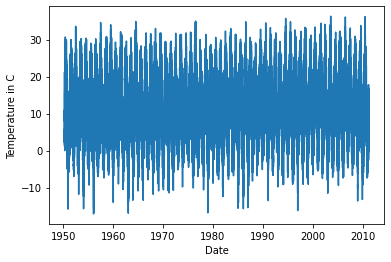

In [73]:
plt.figure()
plt.plot(df[timecol], df[tempcol])
plt.xlabel('Date')
plt.ylabel('Temperature in C')
plt.show()

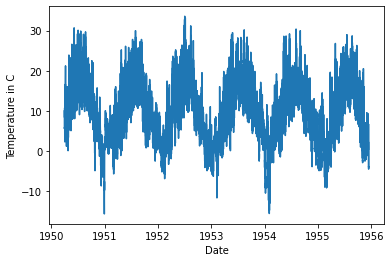

In [83]:
plt.figure()
cnt = 50000
plt.plot(df[timecol][:cnt], df[tempcol][:cnt])
plt.xlabel('Date')
plt.ylabel('Temperature in C')
plt.show()

## FFT
Fast
Discrete etc.

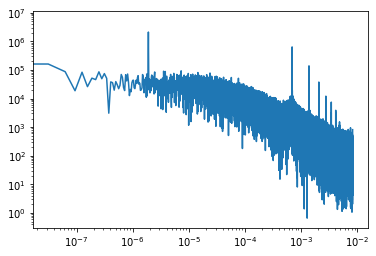

In [81]:

sp = num.fft.rfft(df[tempcol])
freq = num.fft.rfftfreq(len(df[timecol]), d=dt)

plt.figure()
plt.loglog(freq, abs(sp))

plt.show()